# Multiple linear regression.

Unlike the simple linear regression model, the multiple linear regression model is defined as any linear regression model with at least two explanatory variables. But what do we do when we have several variables? This is what we will see in this chapter. And you will finally be able to measure all the power of linear regression despite its simplicity!


## Variables studied

First of all, we will load our dataset. This is a fake Dataset for the example. 

In [1]:
import pandas as pd

SyntaxError: invalid syntax (series.py, line 1051)

In [116]:

import pandas as pd
inputfile = "../data/data_homes.csv"
df=pd.read_csv(inputfile,delimiter=",")

df.head()
#df['classified.price']
# Cleaning steps
# remove unnecessary columns
keep= ["classified.type","classified.subtype","classified.price","classified.transactionType","classified.zip","classified.kitchen.type","classified.building.constructionYear","classified.building.condition","classified.energy.heatingType","classified.certificates.primaryEnergyConsumptionLevel","classified.bedroom.count","classified.land.surface","classified.atticExists","classified.basementExists","classified.outdoor.garden.surface","classified.outdoor.terrace.exists","classified.specificities.SME.office.exists","classified.wellnessEquipment.hasSwimmingPool","classified.parking.parkingSpaceCount.indoor","classified.parking.parkingSpaceCount.outdoor","classified.condition.isNewlyBuilt","customer.name","customer.family"]
df=df[keep]
for i in keep:
    print("@@@@",i)
    print(df[i])
#print(df.columns)




@@@@ classified.type
0             house
1             house
2             house
3       house group
4       house group
           ...     
8286      apartment
8287      apartment
8288      apartment
8289          house
8290          house
Name: classified.type, Length: 8291, dtype: object
@@@@ classified.subtype
0              house
1              house
2              house
3        house group
4        house group
            ...     
8286       apartment
8287    ground floor
8288    ground floor
8289           house
8290           house
Name: classified.subtype, Length: 8291, dtype: object
@@@@ classified.price
0               1325000
1                338744
2               2950000
3       283000 - 304000
4       220000 - 259000
             ...       
8286             295000
8287             269000
8288             269000
8289             225000
8290             225000
Name: classified.price, Length: 8291, dtype: object
@@@@ classified.transactionType
0       for sale
1       for 

KeyError: 'classified.basementExists'

In [97]:
df.columns

Index(['classified.type', 'classified.subtype', 'classified.price',
       'classified.transactionType', 'classified.zip',
       'classified.kitchen.type', 'NOTRclassified.building.constructionYear',
       'classified.building.condition', 'NOTRclassified.energy.heatingType',
       'NOTRclassified.certificates.primaryEnergyConsumptionLevel',
       'classified.bedroom.count', 'classified.land.surface',
       'classified.atticExists', 'classified.outdoor.garden.surface',
       'classified.outdoor.terrace.exists',
       'classified.wellnessEquipment.hasSwimmingPool',
       'classified.parking.parkingSpaceCount.indoor'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 23 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   classified.type                                        47 non-null     object 
 1   classified.subtype                                     47 non-null     object 
 2   classified.price                                       47 non-null     object 
 3   classified.transactionType                             47 non-null     object 
 4   classified.zip                                         47 non-null     int64  
 5   classified.kitchen.type                                37 non-null     object 
 6   classified.building.constructionYear                   38 non-null     float64
 7   classified.building.condition                          41 non-null     object 
 8   classified.energy.heatingType                       

In [72]:
df[df['classified.price'].str.find('-') == -1]

AttributeError: Can only use .str accessor with string values!

In [85]:

import pandas as pd
inputfile = "../data/data_homes.csv"
df=pd.read_csv(inputfile)


# Cleaning steps
# remove unnecessary columns
keep= ["classified.type","classified.subtype","classified.price","classified.transactionType","classified.zip","classified.kitchen.type","classified.building.constructionYear","classified.building.condition","classified.energy.heatingType","classified.certificates.primaryEnergyConsumptionLevel","classified.bedroom.count","classified.land.surface","classified.atticExists","classified.basementExists","classified.outdoor.garden.surface","classified.outdoor.terrace.exists","classified.specificities.SME.office.exists","classified.wellnessEquipment.hasSwimmingPool","classified.parking.parkingSpaceCount.indoor","classified.parking.parkingSpaceCount.outdoor","classified.condition.isNewlyBuilt","customer.name","customer.family"]
df=df[keep]


# 
# drop "fromprice - toprice"
df=df[df['classified.price'].str.find('-') == -1]

#just to be sure

df['classified.price'] = df['classified.price'].astype(float)


# reformat categorical features
 
#
# Save cleaned data for model
df.to_csv("../data/data_homes_cleaned.csv")    

   classified.type    classified.subtype  classified.price  \
0            house                 house          349000.0   
1            house                 house          650000.0   
2            house                 house          225000.0   
4            house                 house          750000.0   
5            house                 house          316000.0   
6            house            town house          550000.0   
7            house       apartment block          675000.0   
8            house                 house          695000.0   
9            house               mansion          285000.0   
11           house                 house          315000.0   
12           house                 house          495000.0   
13           house                 house          199500.0   
14           house       apartment block          425000.0   
15           house                 house          425000.0   
16           house                 house          500000.0   
17      

In [70]:
df

,classified.type,classified.subtype,classified.price,classified.transactionType,classified.zip,classified.kitchen.type,classified.building.constructionYear,classified.building.condition,classified.energy.heatingType,classified.certificates.primaryEnergyConsumptionLevel,...,classified.basementExists,classified.outdoor.garden.surface,classified.outdoor.terrace.exists,classified.specificities.SME.office.exists,classified.wellnessEquipment.hasSwimmingPool,classified.parking.parkingSpaceCount.indoor,classified.parking.parkingSpaceCount.outdoor,classified.condition.isNewlyBuilt,customer.name,customer.family


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# read data
#
df = pd.read_csv("../data/data_homes_cleaned.csv")
df=df[['classified.zip','classified.price','classified.building.constructionYear']]


# prepare
# clean

print(df.info())
for i,j in enumerate(df['classified.price']):
    print(i,j)
    try:
        d=float(j)
    except:
        print("@@@@@")
        df=df.drop([i])

# drop "fromprice - toprice"
df[df['classified.price'].str.find('-') != -1].drop()
df=df.dropna()

print(df.info()) 
#
X=df[['classified.price','classified.building.constructionYear']]
y=df['classified.zip']

'''
# How to use `sklearn` now with multiple features ? Well, it's simple, you don't change anything. `sklearn` takes care of everything for you.

1. Import `LinearRegression` from `sklearn`
2. Create a `regressor` variable and instantiate your `LinearRegression` class.
3. Train your model with `X_train` and `y_train`.
4. Display the score of your model with `X_train` and `y_train`.
5. Use the predict method of your model on your test dataset (`X_test`).
6. Display the score of your model with `X_test` and `y_test`.
'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.2)

from sklearn.linear_model import LinearRegression
#X_train=X_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
regressor=LinearRegression().fit(X_train,y_train)

ValueError: could not convert string to float: '365000 - 371000'

As you can see we now have 100 rows, 2 features and 1 target.

**Exercise :** Create the `X` and `y` variables and define which column will be the target and which column will be the feature. 
They must be of type `numpy.ndarray`. Our variable `X` has two dimensions this time.

In [4]:
import numpy as np

X=df[['x_1','x_2']]
#X
y=df[['y']]
#y

X=np.array(X)
y=np.array(y)



### Relationship between variables

To represent a dataset that has two features, we can use 3D visualization.

**Exercise :** Use a 3D matplotlib (or other) graph to view the dataset. 

In [5]:
X[:,0]

array([ 1.05445173, -0.36274117, -0.85409574,  1.3263859 , -0.4615846 ,
        1.94362119, -1.60205766, -0.40178094, -0.97727788,  0.37816252,
       -0.30230275, -0.74745481, -0.18718385,  0.31872765, -1.53624369,
        0.40015721, -0.82643854, -0.74216502,  0.70657317,  0.90082649,
       -0.57884966, -0.20829876,  0.68159452,  0.8024564 ,  0.77749036,
       -1.5447711 ,  0.96939671,  0.67643329,  1.78587049,  1.5430146 ,
        0.05616534, -0.21274028, -0.35955316, -1.23482582,  0.15634897,
        0.4105985 , -0.15501009,  1.20237985,  0.40198936, -1.07993151,
        0.92220667, -0.68954978, -0.17154633,  0.08755124,  1.89588918,
       -0.66347829,  1.84926373,  0.33367433, -1.37495129,  1.46935877,
        0.01747916, -1.18063218,  0.26705087,  1.11701629,  1.45427351,
        2.2408932 , -0.14963454,  0.90604466, -1.1680935 , -0.65102559,
       -1.98079647, -0.4380743 ,  0.84436298,  1.22244507,  0.63503144,
        0.3869025 , -0.20515826,  0.12898291,  1.33652795,  1.95

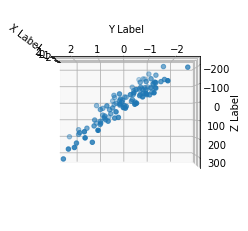

In [6]:
import matplotlib.pyplot as plt


j=180
k=180

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(j,k)
    

    

If you change the camera angle, you should come across something that looks like this: 
<img src="./assets/3dplot.png" />

This appears to be a positive linear correlation. What do you say?  


If our dataset has more than two dimensions, then we won't be able to display it in 3D. Unfortunately for us, the human being can only perceive 3 dimensions. In this case, we will have no other choice than to display one scatter plot per variable.

And it is there that we realize that the linear regression may be very simple, as soon as we go beyond 3 dimensions, the human being will hardly be able to visualize all the data while the machines are doing very well.

**Exercise :** Create a scatter plot for each variable with respect to the target. You may use  `plt.tight_layout()` after plotting if the graph is too cramped.

Text(0, 0.5, 'Y Label')

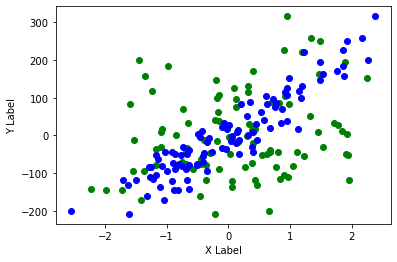

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X[:,0], y,color='green')
ax.scatter(X[:,1], y,color='blue')
plt.xlabel('X Label')
plt.ylabel('Y Label')
#plt.tight_layout()


**Exercise :** Show correlation coefficients. 

In [40]:
from scipy import stats as sc
X0=X[:,0]
X1=X[:,1]

X0=X0.reshape(-1,1)
X1=X1.reshape(-1,1)
y
#print(type(X0),type(X1))
print(sc.stats.spearmanr(X0, y)) 
print(sc.stats.spearmanr(X1, y))


SpearmanrResult(correlation=0.2131413141314131, pvalue=0.033242149992682116)
SpearmanrResult(correlation=0.9236483648364835, pvalue=1.3159076055708707e-42)


### Split the dataset

You now know the process!

**Exercise :** Import `train_test_split` from `sklearn` and split the dataset and create the variables `X_train`, `X_test`, `y_train`, `y_test`.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=33, test_size=0.2)

##  Load and fit the model (with Sklearn)

In [46]:
from sklearn.linear_model import LinearRegression
#X_train=X_train.reshape(-1, 1)
#y_train=y_train.reshape(-1, 1)
regressor=LinearRegression().fit(X_train,y_train)


In [47]:
regressor.score(X_train, y_train)

0.9307521675787522

In [50]:
ypred=regressor.predict(X_test)
X_test
ypred

array([[ -75.1895544 ],
       [ 256.41021968],
       [  94.7652187 ],
       [-127.35412047],
       [-142.68099536],
       [ 122.27849054],
       [  16.12079053],
       [  86.48069328],
       [   5.23380785],
       [ 225.35462338],
       [  43.4111306 ],
       [-101.06577175],
       [  64.07865113],
       [ -64.35542839],
       [-100.18975527],
       [  79.24982888],
       [-144.54570881],
       [ -33.00053604],
       [-128.6018231 ],
       [-125.0971861 ]])

Text(0, 0.5, 'Y Label')

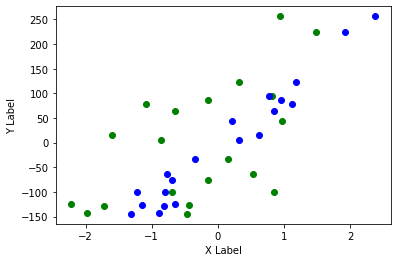

In [51]:
fig = plt.figure()
ax = fig.add_subplot()
ax.scatter(X_test[:,0], ypred,color='green')
ax.scatter(X_test[:,1], ypred,color='blue')
plt.xlabel('X Label')
plt.ylabel('Y Label')
#plt.tight_layout()

And voilà !

## From Scratch 
You will see that with matrices, it doesn't change much in the way of proceeding. Matrix writing, moreover, remains the same as simple regression. 

### Transform to matrix

$$
\\ Y = X \cdot \theta \\
$$
The $Y$ vector is the same too
$$ Y =
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
$$

The $X$ matrix will have as many dimensions as there are features +1  (n+1)

$$ X =
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, ..., x^{(m)}_{n}, 1\\
x^{(2)}_1, x^{(2)}_2, ..., x^{(m)}_{n}, 1\\
x^{(3)}_1, x^{(3)}_2, ..., x^{(m)}_{n}, 1\\
x^{(m)}_1,x^{(m)}_2, ..., x^{(m)}_{n}, 1\\
\end{bmatrix}
$$

The theta vector will have as many lines as there are parameters +1 (for the constant). 
$$ \theta =
\begin{bmatrix}
a\\
b\\
c\\
... \\
\end{bmatrix}
$$

For our case with our dataset, we can write it like this: 

$$
\begin{bmatrix}
y^{(1)}\\
y^{(2)}\\
y^{(3)}\\
... \\
y^{(m)}\\
\end{bmatrix}
=
\begin{bmatrix}
x^{(1)}_1, x^{(1)}_2, 1\\
x^{(2)}_1, x^{(2)}_2, 1\\
x^{(3)}_1, x^{(3)}_2, 1\\
x^{(m)}_1,x^{(m)}_2,  1\\
\end{bmatrix}
\cdot
\begin{bmatrix}
a\\
b\\
c\\
\end{bmatrix}
$$

**Exercise :** Create a variable `X` which contains a matrix of shape `(100,3)` with two column's filled with values of our dataframe and then another one with 1's.

In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv('./data/data_multi.csv')

X=np.array(df)
X[:,2]=1
X[0]


array([ 1.05445173, -1.07075262,  1.        ])

**Exercise :** Check that your matrix is of shape `(100,3)`. 

In [81]:
X.shape

(100, 3)

**Exercise :** Create the theta vector with three random values. Your vector must be of shape 
`(3,1)`.

In [82]:
theta=np.array([[2],
                [4],
                [6]])

## Create and fit the model
### Define your model

**Exercise :** Create a `model` function that receives as parameter `X` and `theta`. The function must return the computed predictions `y_pred`. This is exactly the same model as last time. 

In [83]:
def model (X, theta):
    y_pred=X.dot(theta)
    return y_pred

### Cost function

Well we have the model, the $\theta$ vector, the $X$ matrix. What are we missing? The cost function of course!
And you know what? This too is exactly the same MSE function from last time. 

$$MSE(\theta) = \frac {1}{2m}  \sum (X \cdot \theta - Y)^2$$

**Exercise :** Create a MSE function that receives as parameters `X`, `y` and `theta` using the example above.

In [84]:
def MSE(X,y,theta):
    m=len(X)
    M=(sum((X.dot(theta) - y)**2)) / (2*m) 
    return M


### Gradient descent
It's time to find the minimum of our function. Well again, nothing changes compared to the last time. 

$$ \frac {\partial MSE(\theta) }{\partial \theta}  = \frac {1}{m} X^T \cdot (X \cdot \theta - Y)$$

**Exercise :** Create a `grad` function that receives as parameter `X`, `y`, `theta`.

In [85]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

**Exercise :**

1. Create a `gradient_descent` function that receives as parameter `X`, `y`, `theta`, `learning_rate`, `n_iterations`.
2. In the function, create a variable `cost_history` with a matrix filled with 0 and which has a length of `n_iterations`. We will use it to display the histogram of the model learning process.
3. Create a loop that iterates up to `n_iterations`.
4. In the loop, update `theta` with the formula of the gradient descent (the example above).
5. In the loop, update `cost_history[i]` with the values of `MSE(X,y,theta)`.
6. return `theta` and `cost_history`.

In [86]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations).reshape(n_iterations,1)
    #print(cost_history)
    for lp in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[lp] = MSE(X,y,theta)
        #print("###",cost_history[lp])
    return theta,cost_history

### Train your model 

**Exercise :** Create variables `n_iterations` and `learning_rate`.

In [87]:
n_iterations=1000
learning_rate=0.01

**Exercise:** Create variables `theta_final`, `cost_history` and call `gradient_descent()`.

In [88]:
theta_final,cost_history=gradient_descent(X,y,theta,learning_rate,n_iterations)

In [89]:
theta_final
#cost_history

array([[27.59057925],
       [99.50456686],
       [-1.53933749]])

**Exercise :** 
Create a `predictions` variable that contains `model(X, theta_final)`.



In [90]:
predictions=model(X, theta_final)

**Exercise :** Plot your predictions in 3D and the true values of the dataset.

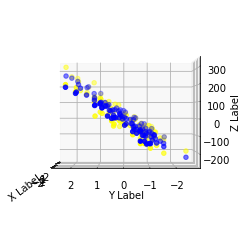

In [96]:
import matplotlib.pyplot as plt

j=0
k=180

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y,color='yellow')

ax.scatter(X[:,0], X[:,1], predictions,color='blue')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(j,k)

**Exercise :** Plot `cost_history`.

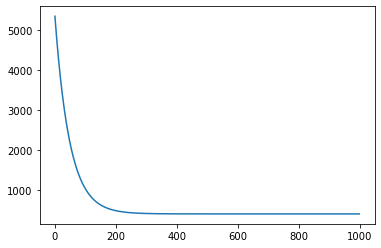

In [97]:
plt.plot(cost_history)

### Evaluation

In [99]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [100]:
coef_determination(y, predictions)

0.9320499569964104

### Congratulations !

You are now able to create a multiple variable regression model from scratch, well, from the matrix!

<img src="https://media.giphy.com/media/W9lzJDwciz6bS/giphy.gif">